In [202]:
# setup for doing assignment questions

import random
import math
import numpy as np

random.seed()

PARTICLE_RADIUS = 1.0 / 2.0     # radius of each particle that is inserted
BOX_DIMENSIONS = (11.0, 11.0)   # dimensions of the system to place the particles
MAX_ATTEMPTS = 1000             # maximum number of attempts to randomly place a particle

BOX_AREA = BOX_DIMENSIONS[0] * BOX_DIMENSIONS[1]
PARTICLE_AREA = 2 * np.pi * PARTICLE_RADIUS

def check_overlap(check_particle, particle_list):
    cx, cy = check_particle
    
    for x, y in particle_list:
        dx = cx - x
        dy = cy - y
        
        if dx * dx + dy * dy < 4 * PARTICLE_RADIUS * PARTICLE_RADIUS:
            return True
    
    return False

# randomly inserts a particle inside the box
def insert_particle(particle_list, x=None, y=None):
    x0 = PARTICLE_RADIUS
    y0 = x0
    x1 = BOX_DIMENSIONS[0] - x0
    y1 = BOX_DIMENSIONS[1] - y0

    # if coordinates were provided, check if it can be placed there
    if x is not None and y is not None:
        particle = (x, y)
        
        # if the given particle position is outside the box or overlaps
        # the walls, then attempts will be set to 1
        if x >= x0 and x <= x1 and y >= y0 and y <= y1:
            attempts = 1 if check_overlap(particle, particle_list) else 0
        else:
            attempts = 1
        inserted = (attempts == 0)
    
    # if coordinates were not provided, find a random position
    else:
        inserted = False
        attempts = -1
        
        while not inserted and attempts <= MAX_ATTEMPTS:
            attempts += 1
            particle = (random.uniform(x0, x1), random.uniform(y0, y1))
            inserted = not check_overlap(particle, particle_list)
    
    # if the particle was inserted, then add it tot he list     
    if inserted:
        particle_list.append(particle)
    
    # returns the number of times it attempted to place the parcticle
    # if coordinates were provided, and placement was successful, the number
    # of attempts will be 0. Otherwise, random attempts will try up to MAX_ATTEMPTS
    # times.
    return attempts



Maximum particles: 79
Maximum particle density: 2.0511224763106917


Text(0.5, 1.0, 'Number of attempts to insert additional particles')

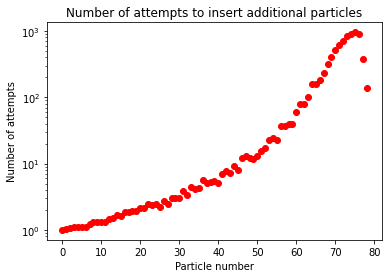

In [216]:
# question 1 part a)

import matplotlib.pyplot as plt

def fill_box(desired_density=0):
    particle_list = []
    attempt_list = []
    inserted = True
    
    density = 0
    
    # keep inserting particles until no more positions can be
    # found after MAX_ATTEMPTS number of attempts
    while inserted and ((density < desired_density) if desired_density > 0 else True):
        attempts = insert_particle(particle_list)
        attempt_list.append(attempts + 1)
        inserted = (attempts <= MAX_ATTEMPTS)
        density += PARTICLE_AREA / BOX_AREA if inserted else 0
        
    return attempt_list, density

# question 1

avg_attempt_list = []
N = 100

for n in range(0, N):
    attempt_list, density = fill_box()
    if n == 0:
        avg_attempt_list = attempt_list
    else:
        dlen = len(attempt_list) - len(avg_attempt_list)
        avg_attempt_list += [MAX_ATTEMPTS + 1] * max(0, dlen)
        attempt_list += [MAX_ATTEMPTS + 1] * max(0, -dlen)
        for i in range(0, len(avg_attempt_list)):
            avg_attempt_list[i] += attempt_list[i]
            

for i in range(0, len(avg_attempt_list)):
    avg_attempt_list[i] /= N
        
max_particles = len(avg_attempt_list)

print("Maximum particles: {}".format(max_particles))
print("Maximum particle density: {}".format(max_particles * PARTICLE_AREA / BOX_AREA))

plt.plot(avg_attempt_list, 'ro')
plt.xlabel("Particle number")
plt.ylabel("Number of attempts")
plt.yscale("log")
plt.title("Number of attempts to insert additional particles")
    

The graph above plots the average number of attempts to insert the 
each additional particle. At larger numbers of particles, more attempts
are required. Towards the upper end, the displayed average is 
less accurate since fewere realizations can achieve that many 
particles. 

To get the data, the insertion experiment is repeated 100 times,
and during each experiment, an
attempt is made to insert the particle at a random point. If the
point causes overlaps with another particle, then the insertion fails.
Failure can occur 1000 times--which is set as a "reasonable" limit for
assuming no more particles can be placed--before the experiment ends.

Across different tests, it was found a maximum 80 particles could be
placed, corresponding to a particle density of 2.771. 
Theoretically with perfect placement, 121 particles 
could be placed.

Text(0.5, 1.0, 'Number of attempts to insert additional particles')

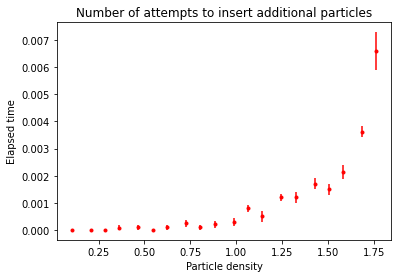

In [230]:
# question 1 part b)

import time

N = 10
data_points = 20
min_density = 0.1
max_density = 1.75
density_delta = (max_density - min_density) / (data_points - 1)

xs = []
ys = []
yerr = []

desired_density = min_density
for i in range (0, data_points):
    achieved_density = []
    elapsed_time = []
    
    for n in range(0, N):
        start = time.time()
        attempt_list, density = fill_box(desired_density)
        end = time.time() - start
        achieved_density.append(density)
        elapsed_time.append(end)
        
    x_value = sum(achieved_density) / N
    y_value = sum(elapsed_time) / N
    yerr_value = math.sqrt(sum((y - y_value)**2 for y in elapsed_time)) / N
    
    desired_density += density_delta
    xs.append(x_value)
    ys.append(y_value)
    yerr.append(yerr_value)
        

fig, ax = plt.subplots()
ax.errorbar(xs, ys, fmt='r.', yerr=yerr)
ax.set_xlabel("Particle density")
ax.set_ylabel("Elapsed time")
ax.set_title("Number of attempts to insert additional particles")
            

For each number density placement, the error bars were calculated for the time. They were generated by computing the "standard error" of the time measurements:
$$\frac{1}{N}\sqrt{\sum_i ({t_i - \hat{t}})^2}$$
where $\hat{t}$ is the average time it took to place the particles, $t_i$ is the $i$th time measurement, and $N$ is the number of measurements. In this case, $N=10$.

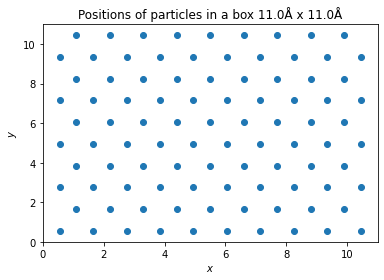

In [170]:
# question 2, generating a hexagonal lattice

ROWS = 5 # number of rows of the lattice
LATTICE_SEP = (BOX_DIMENSIONS[0] / ROWS) / 2.
FIRST_POS = LATTICE_SEP / 2.
EPS = 1e-2

particle_list = []
inserted = True

x = FIRST_POS
y = FIRST_POS
while inserted:
    inserted = True if insert_particle(particle_list, x, y) == 0 else False
    
    x += LATTICE_SEP
    y += int((x + EPS) / BOX_DIMENSIONS[0]) * LATTICE_SEP
    x -= int((x + EPS) / BOX_DIMENSIONS[0]) * (BOX_DIMENSIONS[0] - FIRST_POS)

if not particle_list:
    print("too many rows: particles would overlap")

else:
    xs, ys = zip(*particle_list)

    plt.plot(xs, ys, 'o')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.xlim([0, BOX_DIMENSIONS[0]])
    plt.ylim([0, BOX_DIMENSIONS[1]])
    plt.title("Positions of particles in a box {}Å x {}Å".format(*BOX_DIMENSIONS))



In [168]:
# question 3, counting the energy of interaction of the hexagonal lattice

cutoff = BOX_DIMENSIONS[0] / 2.
energy_closed = 0
energy_periodic = 0
N = len(particle_list)

for i in range(0, N):
    cx, cy = particle_list[i]
    for j in range(i + 1, N):
        x, y = particle_list[j]
        dx = cx - x
        dy = cy - y
        if dx * dx + dy * dy < cutoff * cutoff:
            energy_closed += 1
            
        pdx = dx - BOX_DIMENSIONS[0] * round(dx / BOX_DIMENSIONS[0])
        pdy = dy - BOX_DIMENSIONS[1] * round(dy / BOX_DIMENSIONS[1])
        
        if pdx * pdx + pdy * pdy < cutoff * cutoff:
            energy_periodic += 1
            
print("When interaction energy is unity for particles within {}Å, in a system with {} particles:".format(cutoff, len(particle_list)))

print("="*45)
print("| {:20s}| {:20s}|".format("boundary conditions", "interaction energy"))
print("-"*45)
print("| {:20s}| {:<20.0f}|".format("closed", energy_closed))
print("| {:20s}| {:<20.0f}|".format("periodic", energy_periodic))
print("="*45)

print("Total energy = (interaction energy) + {} * (energy of each particle)".format(len(particle_list)))

When interaction energy is unity for particles within 5.5Å, in a system with 95 particles:
| boundary conditions | interaction energy  |
---------------------------------------------
| closed              | 2165                |
| periodic            | 3364                |
Total energy = (interaction energy) + 95 * (energy of each particle)
